Firstly, The dataset has been read in 'pandas' library in order to  operate on it. The process is: 

In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv("GlobalTemperatures.csv",sep=",") #Data read
global_temp = data[["dt","LandAverageTemperature"]] #I took 2 columns which are 'dt' and 'LandAverageTemperature'

* Only 'dt' and 'LandAverageTemperature' columns were taken from the dataset in this process. Now, it must be checked if 'LandAverageTemperature' column has any 'NaN' values. For this issue, '.isnan()' method is used and for using of this method 'Math' library must be imported. ('NaN' is standing for 'Not a Number'.)

In [3]:
import math

total=0
for i in range(0,len(global_temp)):
    if (math.isnan(global_temp["LandAverageTemperature"][i])):
        total=total+1
total
#global_temp includes 12 NaN Values so i have to fill these values with appropriate values.

12

When the codes were runned,it has been seen the column had 12 'NaN' values.Instead of dropping NaN values,to interpolate these values is more efficient. For this,'.interpolate(method='akima')' method were used. 
   ### AKIMA INTERPOLATION: 
The interpolation method by Akima uses a continuously differentiable sub-spline built from piecewise cubic polynomials. The resultant curve passes through the given data points and will appear smooth and natural.There is no need to solve large equation systems and therefore this interpolation method is computationally very efficient. Because no functional form for the whole curve is assumed and only a small number of points is taken into account this method does not lead to unnatural wiggles in the resulting curve. The monotonicity of the specified data points is not necessarily retained by the resulting interpolation function. By additional constraints on the estimated derivatives a monotonicity preserving interpolation function can be constructed

In [4]:
#I use the '.interpolate()' method for filling the missing values.
global_temperature = global_temp.interpolate(method = 'akima')
#Now I check NaN values again,then I'll show no missing values.
total=0
for i in range(0,len(global_temp)):
    if (math.isnan(global_temperature["LandAverageTemperature"][i])):
        total=total+1
total

0

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
pd.options.display.mpl_style = 'default'
%matplotlib inline
#For eliminating any effects on dataset , I have to use 'sm.tsa.seasonal_decompose()' method,but firstly I must change Date index 
#to DateTime index.For this:
global_temperature.reset_index(inplace=True)
global_temperature['dt'] = pd.to_datetime(global_temperature['dt'])
global_temperature = global_temperature.set_index('dt')
#After I do index set-up,now: 
data_decompose = sm.tsa.seasonal_decompose(global_temperature["LandAverageTemperature"])

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


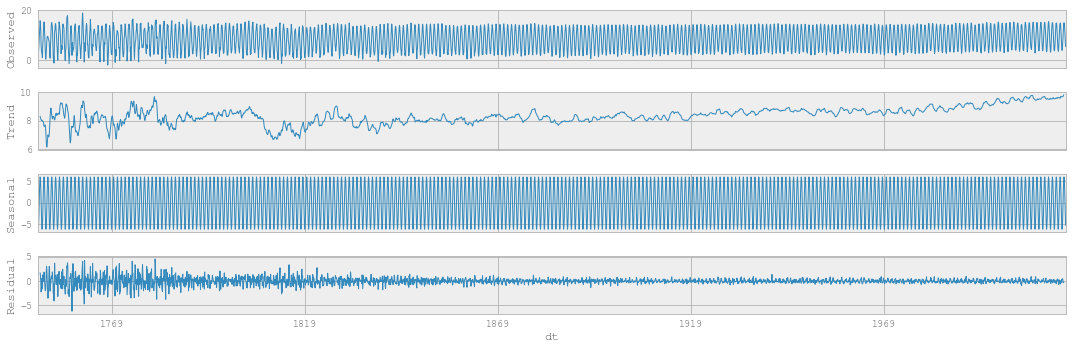

In [7]:
#If I plot the data_decompose,I'll show these plots;
fig= data_decompose.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()
#The first picture is my dataset's plot
#The second picture is trend on my dataset
#The third picture is seasonal effect on my dataset
#The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset

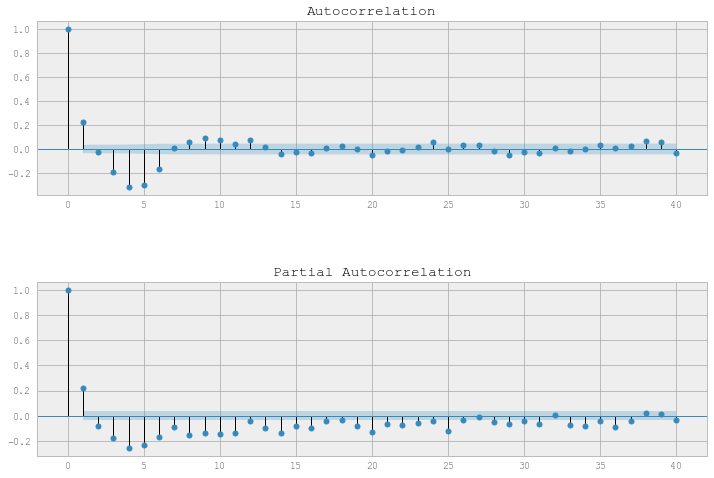

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_decompose.resid.dropna(), lags=40 , ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_decompose.resid.dropna(), lags=40, ax=ax2)
plt.show()

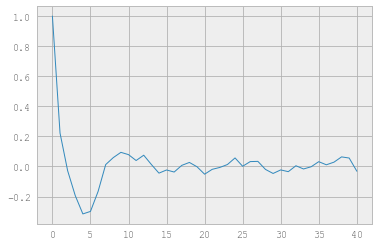

In [8]:
from statsmodels.tsa.stattools import acf, pacf
global_acf=acf(data_decompose.resid.dropna())
plt.plot(global_acf)
plt.show()
#ACF TEST FOR p,d,q Auto arrima 
#pyramid arima 0.6.2
#why nan values? 
#from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(data_decompose.resid.dropna().head(200))
#pyplot.show()

In [9]:
data_decomposition = data_decompose.resid.interpolate(method='akima')

In [11]:
model = ARIMA(data_decomposition.dropna(), order=(2,1,0))

In [12]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                ARIMA Model Results                                 
Dep. Variable:     D.LandAverageTemperature   No. Observations:                 3179
Model:                       ARIMA(2, 1, 0)   Log Likelihood               -4041.843
Method:                             css-mle   S.D. of innovations              0.863
Date:                      Tue, 05 Dec 2017   AIC                           8091.687
Time:                              01:40:48   BIC                           8115.944
Sample:                          08-01-1750   HQIC                          8100.387
                               - 06-01-2015                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0005      0.010     -0.052      0.959      -0.019       0.018
ar.L1.D.LandAverageTemp

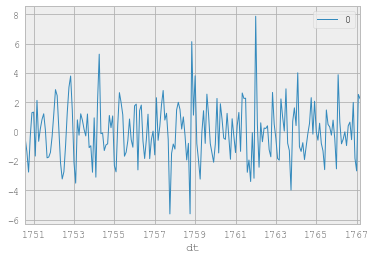

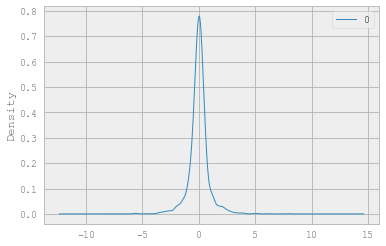

                 0
count  3179.000000
mean     -0.000149
std       0.862973
min      -5.615355
25%      -0.334849
50%       0.001725
75%       0.325829
max       7.861353


In [13]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.head(200).plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [29]:
#convert to standard normal dist.
residual=(residuals+0.000149)/(0.862973)

In [22]:
from scipy import stats

In [27]:
data_normality=stats.kstest(residual,'norm')

In [28]:
data_normality

KstestResult(statistic=1.0, pvalue=0.0)